In [3]:
from sklearn.linear_model import LinearRegression
from typing import Any, Union
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display
import pyMechkar as mechkar
from scipy import stats
from random import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
#desired_width=520
#pd.set_option('display.width', desired_width)
#np.set_printoptions(linewidth=desired_width)
#pd.set_option('display.max_columns',18)

In [5]:
Data = pd.read_csv("final_csv1_full_v3.csv", header=0)
#pd.options.display.max_columns = 13
#display(Data)
print(Data.head())

   Customer_ID  Weeknum  Product  Customer_Number  Sum_Quantity  \
0       0.0048       11       17        416000001            33   
1       0.0048       12       17        416000001            44   
2       0.0048       13       17        416000001            33   
3       0.0048       14       17        416000001             0   
4       0.0048       15       17        416000001             3   

   Avg_Price_Change  Avg_Price_Change_1  Sum_Quantity_1_minus_Sum_Quantity  \
0              3.61                3.61                                 55   
1              3.61                3.61                                 55   
2              3.61                3.65                                -33   
3              3.65                3.61                                  3   
4              3.61                3.61                                 27   

   Avg_Quantity_for_Week  Avg_Quantity_for_PO        ...         \
0                  41.74                41.74        ...     

In [6]:
Data.describe()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
count,118974.000000,118974.000000,1.189740e+05,1.189740e+05,118974.000000,118974.000000,118974.000000,118974.000000,118974.000000,118974.000000,...,118974.000000,118974.000000,118974.000000,118974.0,118974.000000,118974.000000,118974.000000,118974.000000,118974.000000,118974.000000
mean,0.008067,22.663952,6.878473e+12,4.160039e+08,29.228663,5.950698,5.942970,36.361491,27.034780,38.824426,...,0.040387,0.289139,102956.739330,12757437.0,0.375603,29.463885,20.049923,0.084842,1.681761,29.847832
std,0.003786,6.897725,1.658940e+12,2.688093e+04,64.527474,5.922505,5.919834,230.905524,45.379323,61.509532,...,0.196866,0.453364,48316.567114,0.0,0.484280,3.423400,4.207903,0.278648,1.144939,66.233040
min,0.000000,11.000000,1.700000e+01,4.160000e+08,0.000000,0.760000,0.760000,-2139.000000,0.000000,1.000000,...,0.000000,0.000000,24.000000,12757437.0,0.000000,21.570000,11.290000,0.000000,0.000000,0.000000
25%,0.005300,17.000000,7.290000e+12,4.160001e+08,3.000000,2.750000,2.750000,-6.000000,7.740000,11.690000,...,0.000000,0.000000,67778.000000,12757437.0,0.000000,26.860000,17.570000,0.000000,1.050000,3.000000
50%,0.008000,23.000000,7.290003e+12,4.160001e+08,12.000000,4.020000,4.020000,6.000000,14.000000,19.780000,...,0.000000,0.000000,101711.000000,12757437.0,0.000000,31.430000,21.290000,0.000000,1.280000,12.000000
75%,0.010200,29.000000,7.290004e+12,4.160002e+08,28.000000,6.870000,6.870000,24.000000,27.860000,38.750000,...,0.000000,1.000000,130561.000000,12757437.0,1.000000,32.000000,24.140000,0.000000,1.780000,30.000000
max,0.020600,34.000000,7.290108e+12,4.162001e+08,3632.000000,32.240000,32.240000,18462.000000,917.700000,1480.000000,...,1.000000,1.000000,263223.000000,12757437.0,1.000000,34.000000,25.140000,1.000000,23.000000,3632.000000


In [7]:
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [8]:
Data.dtypes[Data.dtypes=='float64']

Customer_ID              float64
Avg_Price_Change         float64
Avg_Price_Change_1       float64
Avg_Quantity_for_Week    float64
Avg_Quantity_for_PO      float64
Standard_Price           float64
Temp_Hi                  float64
Temp_Lo                  float64
Frequency_PO             float64
dtype: object

In [9]:
## determine the number of missing values
Data.isna().sum()

Customer_ID                          0
Weeknum                              0
Product                              0
Customer_Number                      0
Sum_Quantity                         0
Avg_Price_Change                     0
Avg_Price_Change_1                   0
Sum_Quantity_1_minus_Sum_Quantity    0
Avg_Quantity_for_Week                0
Avg_Quantity_for_PO                  0
All_week                             0
Count_week_PO                        0
Standard_Price                       0
Above_Standard_Price                 0
Below_Standard_Price                 0
Total_Quantity_for_Customer          0
Total_Quantity                       0
Holiday                              0
Temp_Hi                              0
Temp_Lo                              0
Temp_Rain                            0
Frequency_PO                         0
Sum_Quantity_1_Y                     0
dtype: int64

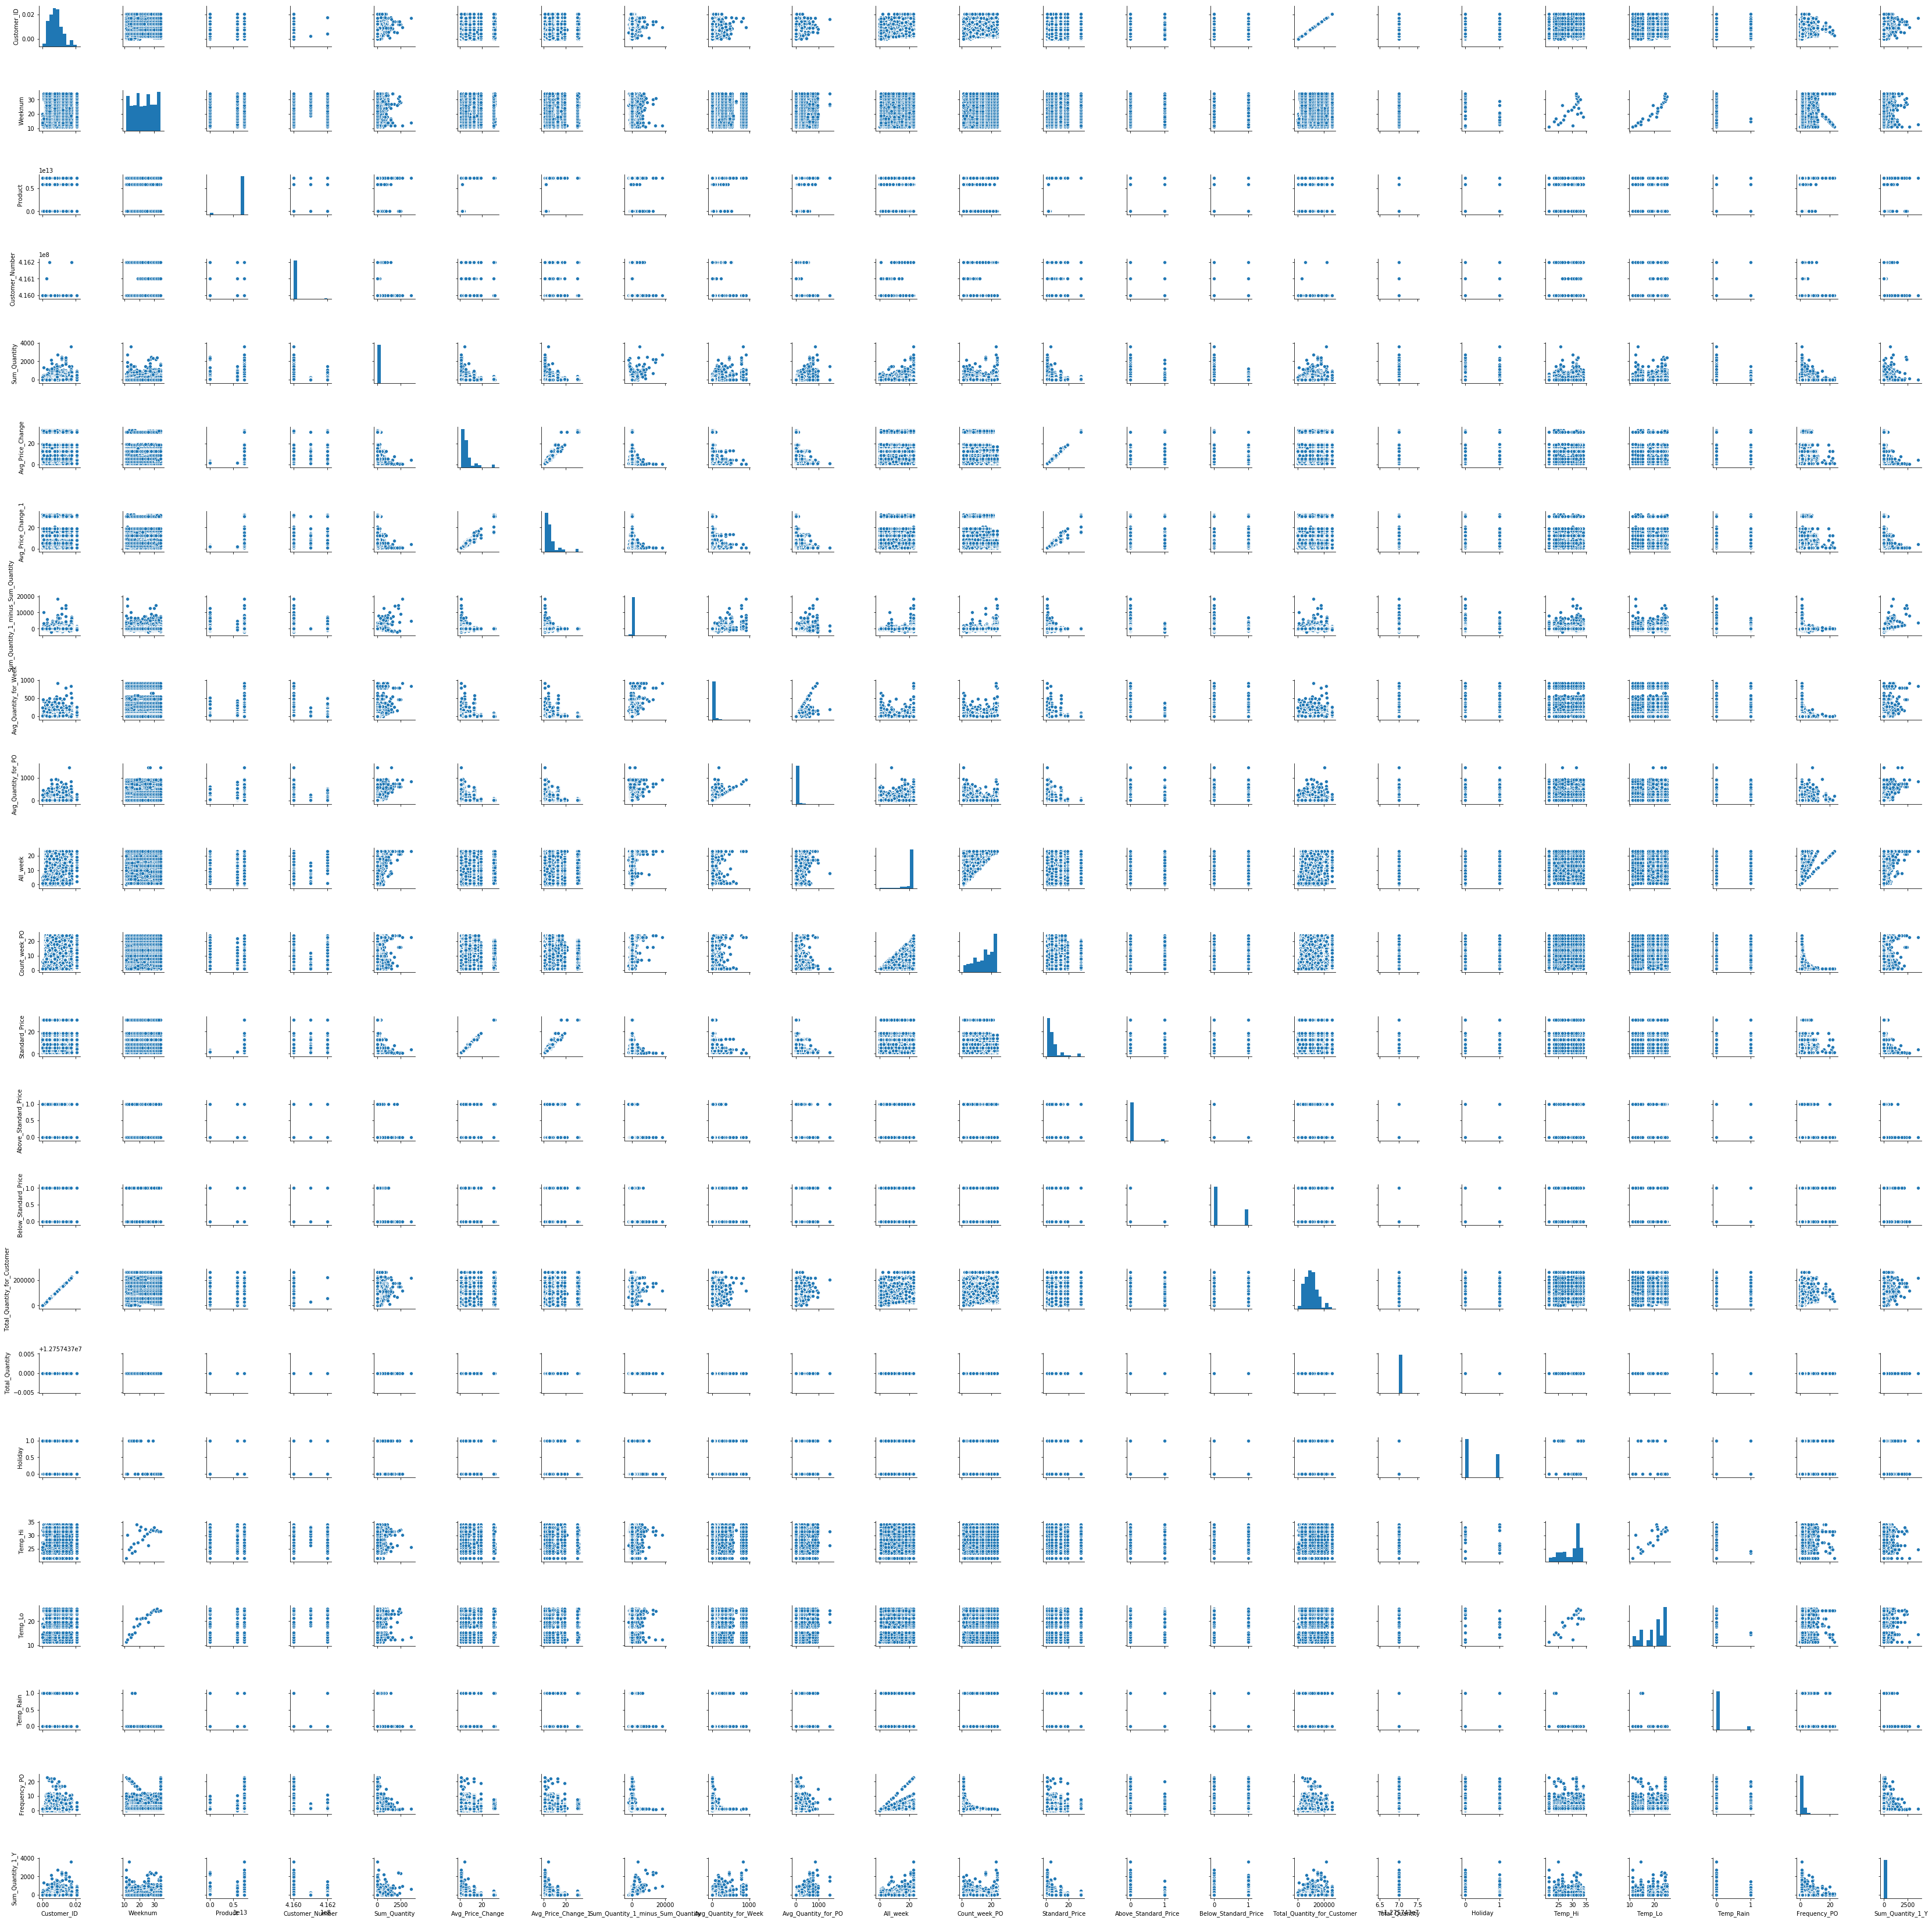

In [10]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
sns.pairplot(Data, height=2)
plt.show()

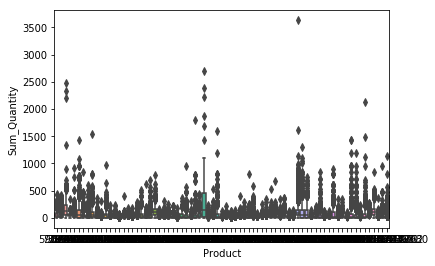

In [11]:
sns.boxplot(x=Data['Product'], y=Data['Sum_Quantity'])
plt.show()

C:\Eyal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


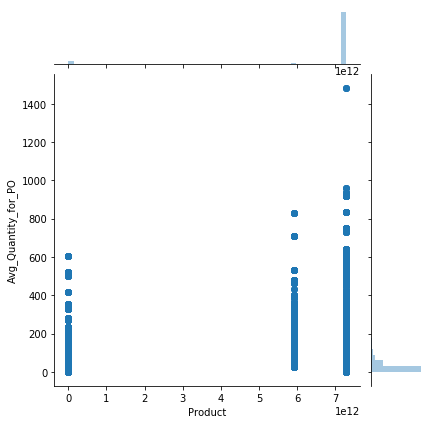

In [12]:
sns.jointplot(x=Data['Product'], y=Data['Avg_Quantity_for_PO'])
plt.show()

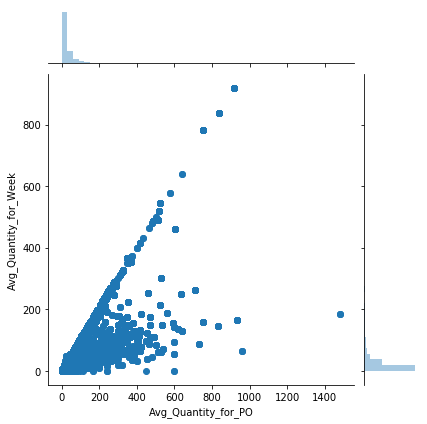

In [13]:
sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()

In [14]:
Data2 = Data.copy()

In [15]:
Data2['Product'] = Data2['Product'].astype('category')


In [16]:
Data2['Customer_Number'] = Data2['Customer_Number'].astype('category')

In [17]:
Data2.dtypes

Customer_ID                           float64
Weeknum                                 int64
Product                              category
Customer_Number                      category
Sum_Quantity                            int64
Avg_Price_Change                      float64
Avg_Price_Change_1                    float64
Sum_Quantity_1_minus_Sum_Quantity       int64
Avg_Quantity_for_Week                 float64
Avg_Quantity_for_PO                   float64
All_week                                int64
Count_week_PO                           int64
Standard_Price                        float64
Above_Standard_Price                    int64
Below_Standard_Price                    int64
Total_Quantity_for_Customer             int64
Total_Quantity                          int64
Holiday                                 int64
Temp_Hi                               float64
Temp_Lo                               float64
Temp_Rain                               int64
Frequency_PO                      

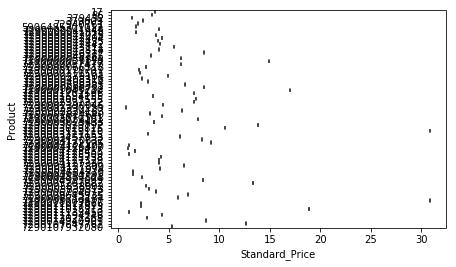

In [18]:
sns.boxplot(x=Data2['Standard_Price'], y=Data2['Product'])
plt.show()

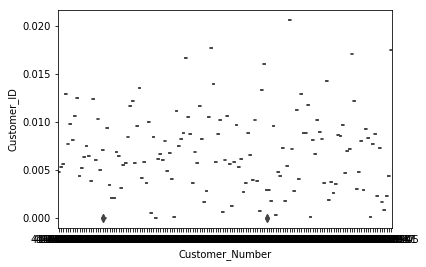

In [19]:
## Customet_ID alse reprosent the share of the customer, Customer number is the name of the customrt 
sns.boxplot(x=Data2['Customer_Number'], y=Data2['Customer_ID'])
plt.show()
# you can see that there are a few "big" customers, however the majority looks a like

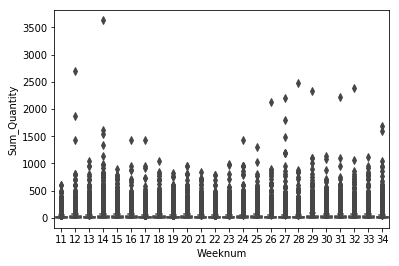

In [20]:
sns.boxplot(x=Data2['Weeknum'], y=Data2['Sum_Quantity'])
plt.show()

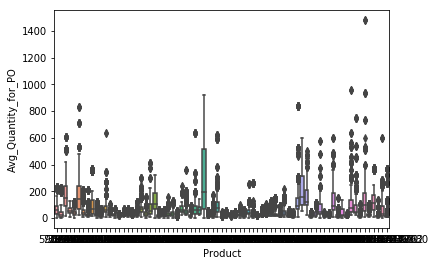

In [21]:
sns.boxplot(x=Data2['Product'], y=Data2['Avg_Quantity_for_PO'])
plt.show()

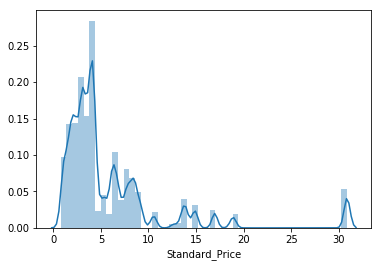

In [22]:
sns.distplot(Data['Standard_Price'])
plt.show()

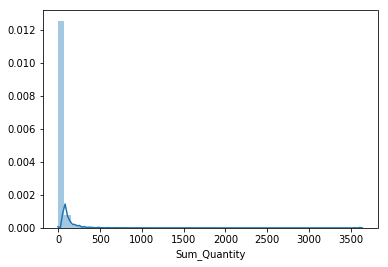

In [23]:
sns.distplot(Data['Sum_Quantity'])
plt.show()

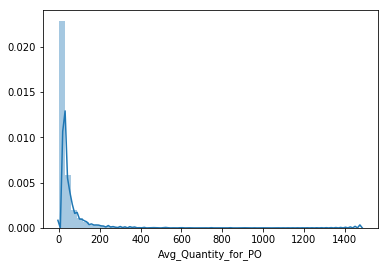

In [24]:
sns.distplot(Data['Avg_Quantity_for_PO'])
plt.show()

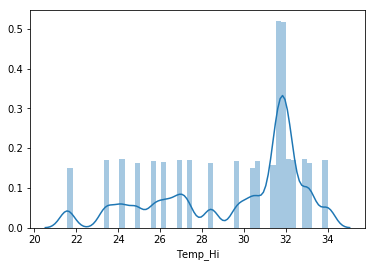

In [25]:
sns.distplot(Data['Temp_Hi'])
plt.show()

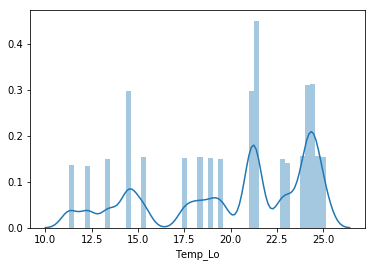

In [26]:
sns.distplot(Data['Temp_Lo'])
plt.show()

In [27]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

##Data3 = Data2.drop(columns=['Avg_Price_Change','Sum_Quantity_1_minus_Sum_Quantity','Avg_Quantity_for_Week' , 'All_week', 'Count_week_PO', 'Above_Standard_Price', 'Below_Standard_Price', 'Total_Quantity','Avg_Price_Change_1','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO','Holiday' ])
##Data3.head

In [28]:
tab1=mechkar.pyMechkar().Table1(data=Data2, y='Customer_number' )
tab1

Factorizing... please wait
***********************
[]
------ Finished in 3.679016590118408econds -----


,Del,Variables,Categories,n,Population
0,0,Individuals,n,1,118974
1,0,Customer_ID,Mean (SD),1,0.00 ( 0.00)
2,0,Customer_ID,Median (IQR),2,0.00 ( 0.00- 0.00)
3,1,Customer_ID,Missing (%),3,--
4,0,Weeknum,Mean (SD),1,22.70 ( 6.90)
5,0,Weeknum,Median (IQR),2,23.00 ( 17.00- 29.00)
6,1,Weeknum,Missing (%),3,--
7,0,Product,7290011194246,0,"2,905.00 ( 2.40%)"
8,0,Product,72940761,1,"2,833.00 ( 2.40%)"
9,0,Product,7290003029792,2,"2,816.00 ( 2.40%)"


C:\Eyal\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


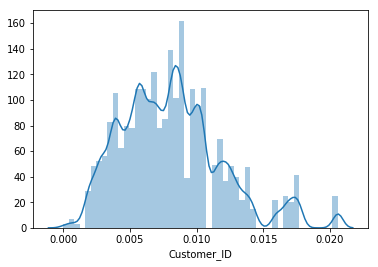

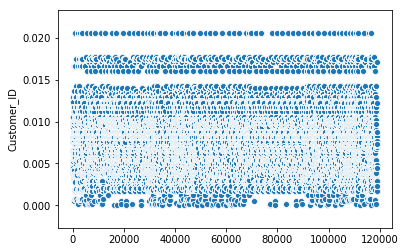

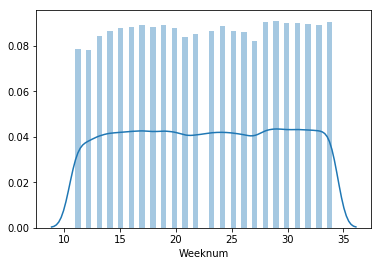

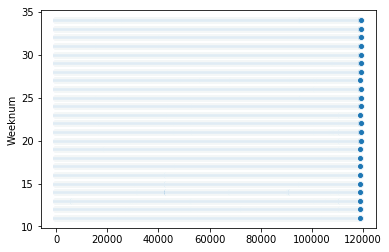

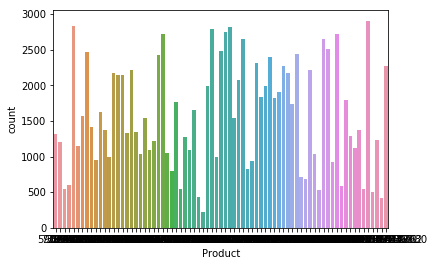

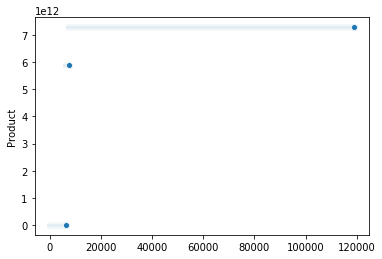

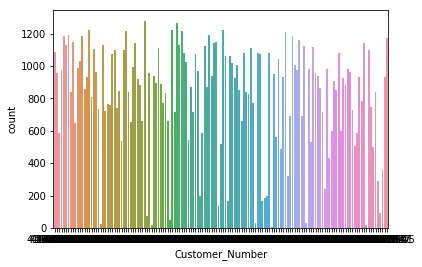

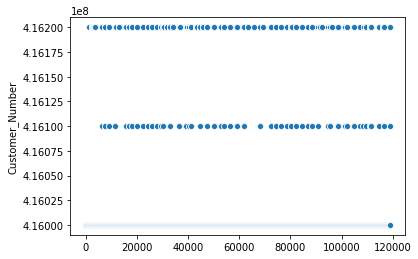

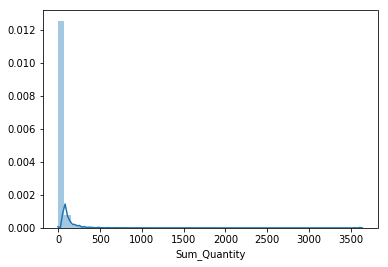

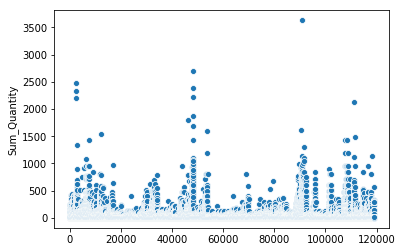

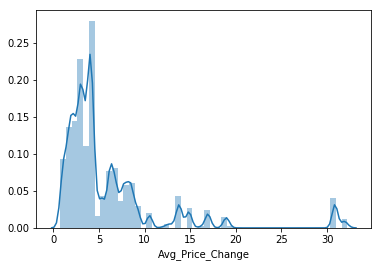

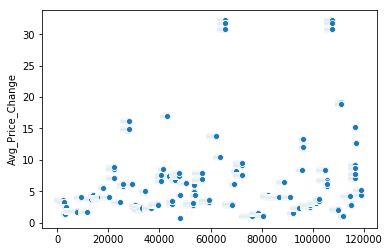

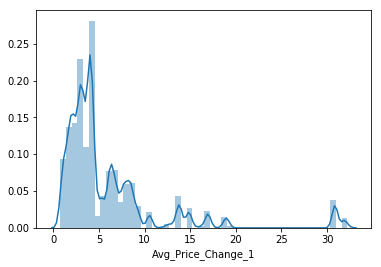

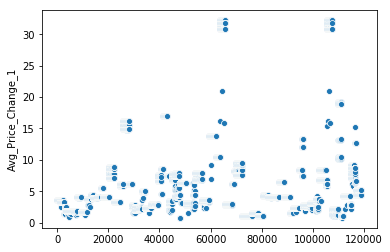

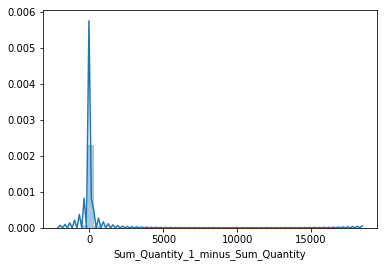

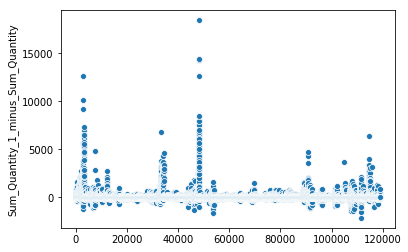

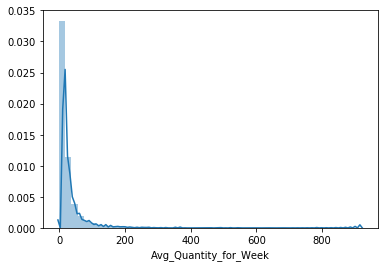

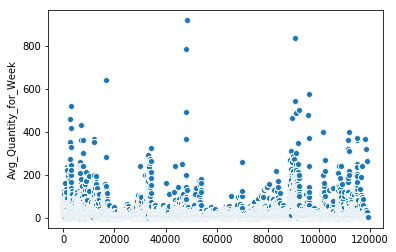

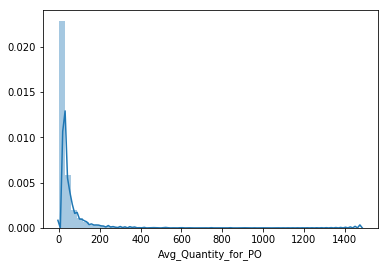

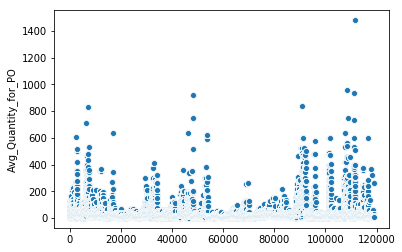

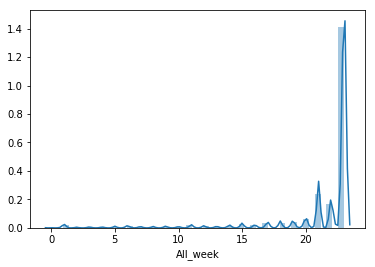

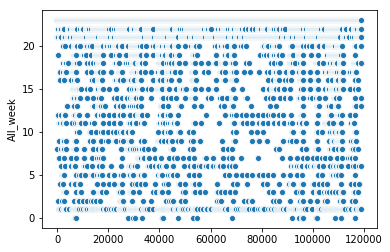

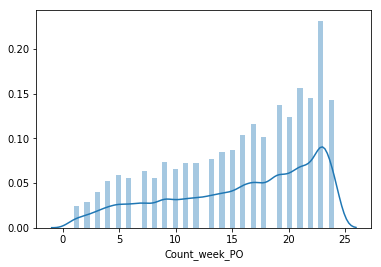

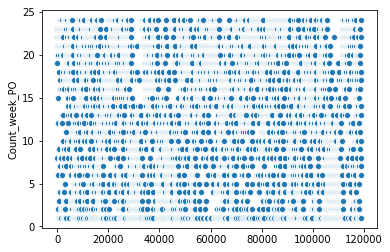

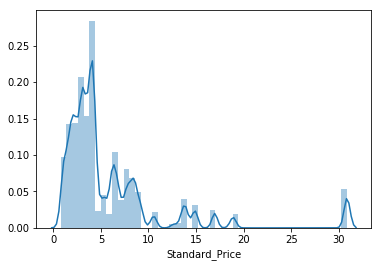

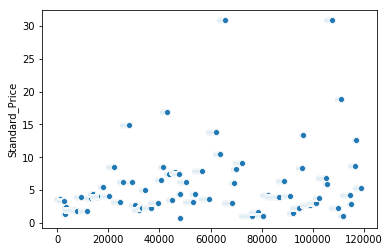

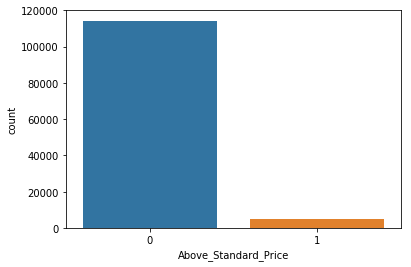

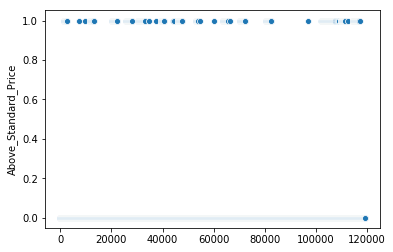

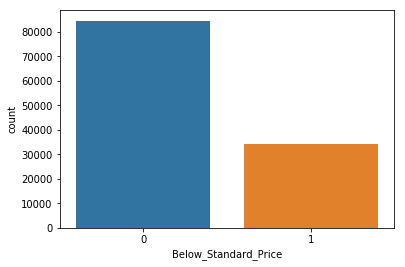

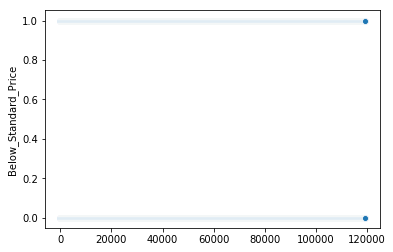

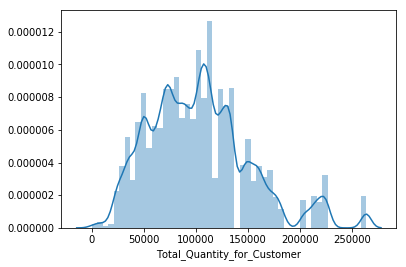

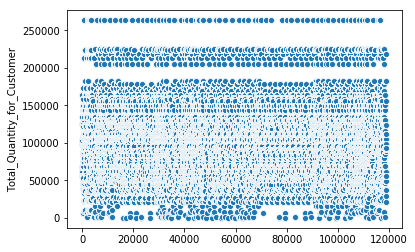

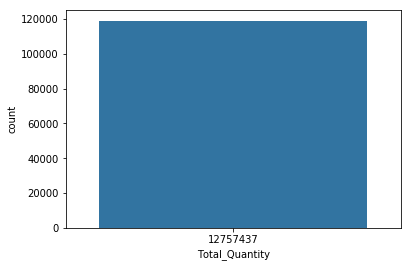

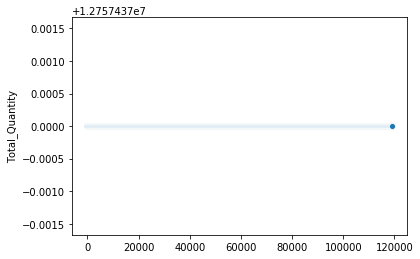

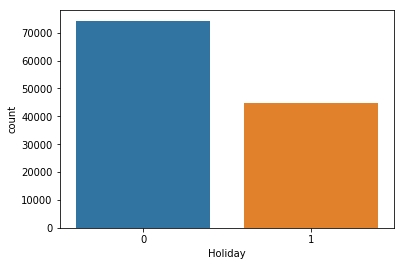

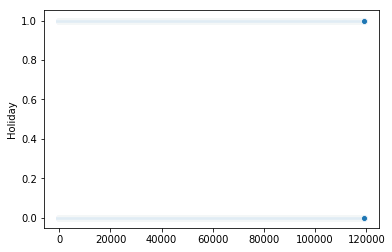

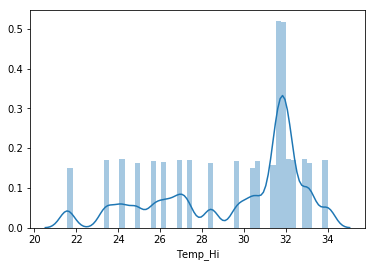

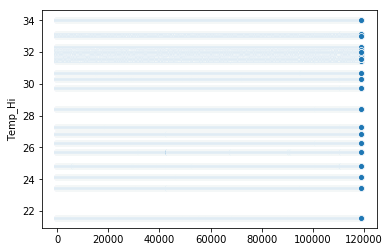

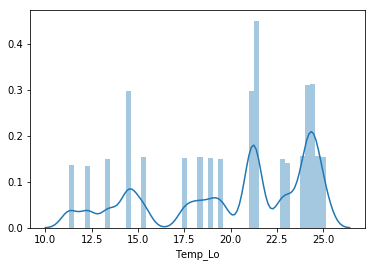

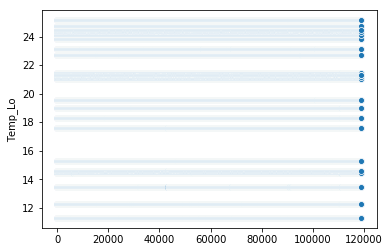

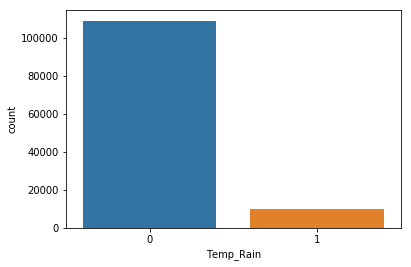

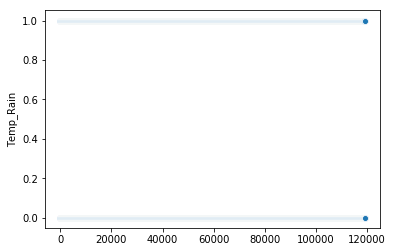

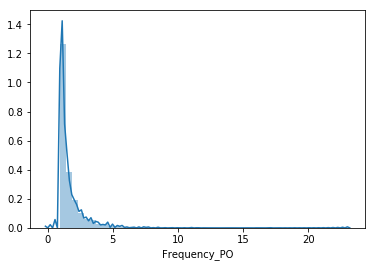

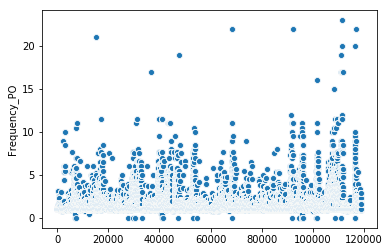

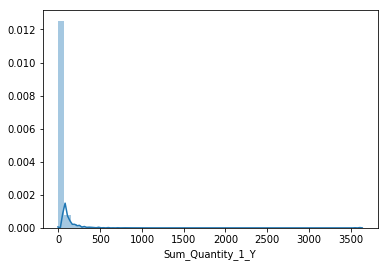

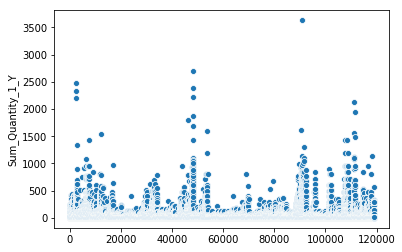

<Figure size 432x288 with 0 Axes>

In [29]:
mechkar.pyMechkar().exploreData(data=Data2)


In [30]:
print (Data2.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

              Sum_Quantity                    
                     count     sum        mean
Product                                       
17                    1321   79930   60.507192
86                    1205   39034   32.393361
379432                 542   96019  177.156827
379609                 598   32549   54.429766
72940761              2833  100713   35.549947
5906485301012         1145  118486  103.481223
7290000041445         1574   69219   43.976493
7290000041858         2464   61318   24.885552
7290000042015         1416  119610   84.470339
7290000042404          956   25617   26.796025
7290000042435         1618   22099   13.658220
7290000042442         1376   77128   56.052326
7290000043111          993   17815   17.940584
7290000043814         2171   35587   16.391985
7290000046327         2143   15432    7.201120
7290000048185         2148   34105   15.877561
7290000056845         1333   27531   20.653413
7290000057118         2209   25045   11.337709
7290000057477

In [31]:
print (Data2)

        Customer_ID  Weeknum        Product Customer_Number  Sum_Quantity  \
0            0.0048       11             17       416000001            33   
1            0.0048       12             17       416000001            44   
2            0.0048       13             17       416000001            33   
3            0.0048       14             17       416000001             0   
4            0.0048       15             17       416000001             3   
5            0.0048       16             17       416000001            30   
6            0.0048       17             17       416000001             3   
7            0.0048       18             17       416000001            92   
8            0.0048       19             17       416000001            33   
9            0.0048       20             17       416000001            50   
10           0.0048       21             17       416000001            17   
11           0.0048       22             17       416000001            50   

In [34]:
Data2ByProduct = Data2.sort_values(by=['Product', 'Weeknum'])
print(Data2ByProduct)

        Customer_ID  Weeknum        Product Customer_Number  Sum_Quantity  \
0            0.0048       11             17       416000001            33   
24           0.0053       11             17       416000002            40   
47           0.0129       11             17       416000006            75   
71           0.0077       11             17       416000007            30   
104          0.0081       11             17       416000009            36   
150          0.0044       11             17       416000014            28   
173          0.0075       11             17       416000018           115   
210          0.0124       11             17       416000022           124   
233          0.0094       11             17       416000029            81   
257          0.0065       11             17       416000037            51   
281          0.0031       11             17       416000038             0   
293          0.0055       11             17       416000039           105   

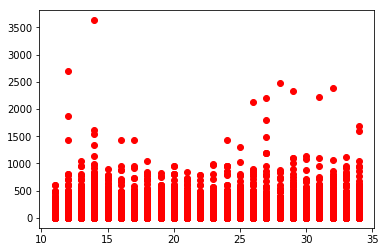

In [37]:
plt.plot (Data2ByProduct.Weeknum, Data2ByProduct.Sum_Quantity, 'ro')

In [38]:
# we can see that in week 14 the quantities are very high, and on week 15 are very low, 

In [39]:
# extract a single product (17) and plot its quantities per week
P17 = Data2ByProduct.Product == 17
Prod17 = Data2ByProduct.copy()[P17]
Prod17.head()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
0,0.0048,11,17,416000001,33,3.61,3.61,55,41.74,41.74,...,0,1,60916,12757437,0,21.57,11.29,0,1.00,44
24,0.0053,11,17,416000002,40,3.61,3.61,98,42.48,44.41,...,0,1,67778,12757437,0,21.57,11.29,0,1.05,69
47,0.0129,11,17,416000006,75,3.61,3.61,-21,42.74,44.68,...,0,1,164021,12757437,0,21.57,11.29,0,1.05,18
71,0.0077,11,17,416000007,30,3.61,3.61,10,32.65,32.65,...,0,1,98187,12757437,0,21.57,11.29,0,1.00,40
104,0.0081,11,17,416000009,36,3.61,3.61,96,29.39,29.39,...,0,1,103273,12757437,0,21.57,11.29,0,1.00,44


Text(0.5, 1.0, '17')

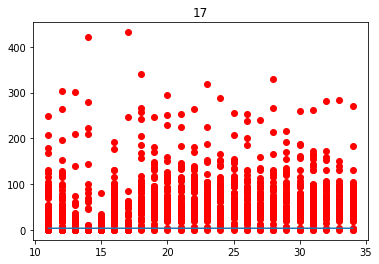

In [41]:
plt.plot (Prod17.Weeknum, Prod17.Sum_Quantity, 'ro')
plt.plot (Prod17.Weeknum, Prod17.Standard_Price)
#plt.plot (Prod17.Weeknum, Prod17.Holiday, label ='Holiday')
#eyal# it doesnt allow me to add Holidays even when in Int type 
plt.title ('17')

In [42]:
Prod17.describe()

,Customer_ID,Weeknum,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,All_week,Count_week_PO,Standard_Price,Total_Quantity_for_Customer,Temp_Hi,Temp_Lo,Frequency_PO,Sum_Quantity_1_Y
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.00,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,0.008282,22.655564,60.507192,3.634285,3.634815,92.827403,62.051824,65.735072,21.673732,20.473126,3.65,105662.035579,29.494883,20.064868,1.101983,61.160484
std,0.003886,6.869138,55.737617,0.019543,0.019148,168.972910,40.492162,43.337129,3.785977,4.557818,0.00,49625.359893,3.430266,4.192638,0.295210,55.454294
min,0.000500,11.000000,0.000000,3.610000,3.610000,-376.000000,0.890000,2.000000,1.000000,1.000000,3.65,5999.000000,21.570000,11.290000,0.960000,0.000000
25%,0.005500,17.000000,25.000000,3.610000,3.610000,4.000000,33.920000,33.920000,23.000000,21.000000,3.65,69557.000000,26.860000,17.570000,1.000000,25.000000
50%,0.008100,23.000000,50.000000,3.650000,3.650000,52.000000,55.240000,58.260000,23.000000,22.000000,3.65,103273.000000,31.430000,21.290000,1.000000,50.000000
75%,0.010200,29.000000,82.000000,3.650000,3.650000,127.000000,82.520000,86.730000,23.000000,23.000000,3.65,130663.000000,32.000000,24.140000,1.050000,83.000000
max,0.020600,34.000000,432.000000,3.650000,3.650000,1622.000000,234.170000,234.170000,23.000000,24.000000,3.65,263223.000000,34.000000,25.140000,3.170000,432.000000


It can be seen that the quantities are subjected to the Holidays (@ week 15)

## Find corelation and P-Values 

In [43]:
df = pd.DataFrame(Data, columns = ['Sum_Quantity','Sum_Quantity_1_Y'])
from scipy import stats 

pearson_coef, p_value = stats.pearsonr(df["Sum_Quantity"], df["Sum_Quantity_1_Y"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


Pearson Correlation Coefficient:  0.37938011797998844 and a P-value of: 0.0


In [44]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [45]:
## Calculate the P Value of the different paramaters (The p-value roughly indicates the probability of an uncorrelated system therefore we are looking for thos)
calculate_pvalues(Data)

C:\Eyal\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Eyal\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,0,0.006,0.0038,0,0,0,0,0,0,0,...,0,0,0,1,0.7088,0.0042,0.0001,0.6771,0,0
Weeknum,0.006,0,0.0197,0.3572,0.0742,0.0191,0.0119,0.0006,0.2646,0.7924,...,0,0,0.0062,1,0,0,0,0,0.0005,0.0124
Product,0.0038,0.0197,0,0.0131,0,0,0,0,0,0,...,0,0.0303,0.0041,1,0.1687,0.0485,0.0139,0.0683,0,0
Customer_Number,0,0.3572,0.0131,0,0,0.0256,0.0284,0,0,0,...,0.0234,0.4017,0,1,0.1236,0.2178,0.2708,0.1949,0.1621,0
Sum_Quantity,0,0.0742,0,0,0,0,0,0,0,0,...,0,0,0,1,0.0003,0.0055,0.3328,0.8981,0,0
Avg_Price_Change,0,0.0191,0,0.0256,0,0,0,0,0,0,...,0,0,0,1,0.072,0.0397,0.0064,0.2262,0,0
Avg_Price_Change_1,0,0.0119,0,0.0284,0,0,0,0,0,0,...,0,0,0,1,0.0512,0.0177,0.0043,0.0653,0,0
Sum_Quantity_1_minus_Sum_Quantity,0,0.0006,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.7016,0.008,0.6612,0,0
Avg_Quantity_for_Week,0,0.2646,0,0,0,0,0,0,0,0,...,0,0,0,1,0.9737,0.5503,0.4096,0.2741,0,0
Avg_Quantity_for_PO,0,0.7924,0,0,0,0,0,0,0,0,...,0.0037,0,0,1,0.0019,0.6861,0.4726,0.1042,0,0


In [46]:
show_p = calculate_pvalues(Data)

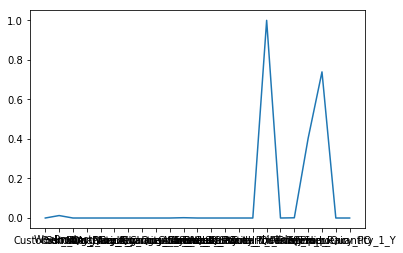

In [47]:
plt.plot(show_p['Sum_Quantity_1_Y'])
plt.show()

In [48]:
## present the corelletion (+1 or -1 implying corelation where exeact -1 or 1 implaying linear corr; 0 implying NO corr)
df = pd.DataFrame(data=Data)
df.corr()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,1.000000,0.007963,-0.008398,0.108949,0.140236,0.018184,0.017724,0.074138,0.186231,0.171686,...,0.014056,-0.072639,0.999972,NaN,-0.001083,0.008295,0.011396,-0.001207,-0.092541,0.139958
Weeknum,0.007963,1.000000,0.006760,0.002670,0.005176,0.006797,0.007296,0.009902,-0.003235,0.000763,...,0.053596,-0.051498,0.007939,NaN,-0.394184,0.661595,0.934874,-0.293873,0.010034,0.007248
Product,-0.008398,0.006760,1.000000,-0.007190,-0.099841,0.144201,0.144053,-0.122658,-0.156349,-0.098648,...,0.022901,-0.006279,-0.008322,NaN,-0.003990,0.005720,0.007133,-0.005286,0.093635,-0.096936
Customer_Number,0.108949,0.002670,-0.007190,1.000000,0.028880,-0.006470,-0.006354,0.048882,0.041713,0.035374,...,-0.006570,-0.002431,0.108633,NaN,-0.004465,0.003573,0.003193,-0.003758,-0.004053,0.027279
Sum_Quantity,0.140236,0.005176,-0.099841,0.028880,1.000000,-0.123152,-0.122806,0.395034,0.688745,0.678986,...,0.016830,-0.190138,0.140303,NaN,0.010521,0.008050,0.002808,0.000371,0.017045,0.379380
Avg_Price_Change,0.018184,0.006797,0.144201,-0.006470,-0.123152,1.000000,0.998576,-0.060664,-0.160904,-0.166589,...,0.266395,0.014297,0.018137,NaN,-0.005217,0.005963,0.007910,-0.003508,0.047088,-0.124564
Avg_Price_Change_1,0.017724,0.007296,0.144053,-0.006354,-0.122806,0.998576,1.000000,-0.061011,-0.161069,-0.167288,...,0.256477,0.018494,0.017679,NaN,-0.005652,0.006879,0.008276,-0.005344,0.046039,-0.125570
Sum_Quantity_1_minus_Sum_Quantity,0.074138,0.009902,-0.122658,0.048882,0.395034,-0.060664,-0.061011,1.000000,0.608408,0.429966,...,-0.023968,0.031888,0.074183,NaN,-0.016164,0.001111,0.007687,0.001271,-0.079862,0.667559
Avg_Quantity_for_Week,0.186231,-0.003235,-0.156349,0.041713,0.688745,-0.160904,-0.161069,0.608408,1.000000,0.831337,...,-0.028203,-0.063583,0.186335,NaN,0.000096,-0.001732,-0.002391,0.003171,-0.127916,0.686235
Avg_Quantity_for_PO,0.171686,0.000763,-0.098648,0.035374,0.678986,-0.166589,-0.167288,0.429966,0.831337,1.000000,...,-0.008412,0.040116,0.171770,NaN,-0.009004,-0.001172,-0.002082,0.004711,0.191741,0.691566


In [49]:
show_corr = df.corr()

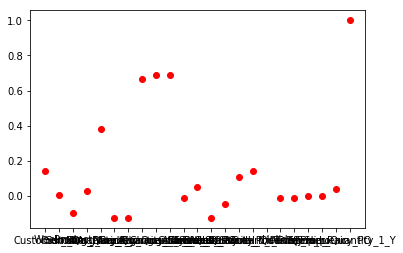

In [50]:
plt.plot(show_corr['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [51]:
y = Data.values[:, -1]
x = Data.values[:, 2:-1]

In [52]:
indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]

In [53]:
x_train = x[train_indx]
x_test = x[test_indx]
y_train = y[train_indx]
y_test = y[test_indx]
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [54]:
# Train number of line (90%)
len (x_train)

107077

In [55]:
#test number of lines (10%)
len (x_test)

11897

In [56]:
mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x_train, y_train)
pred_linear = mod_linear.predict(x_test)
pred_linear = np.round(pred_linear)
## pred_linear_cvs = mod_linear.predict(csvTest) ## write to file
acc_linear=accuracy_score(y_test, pred_linear, normalize=False)
print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
print("MAE linear", mae_linear)

acc linear 487
MAE linear 14.328318063377322


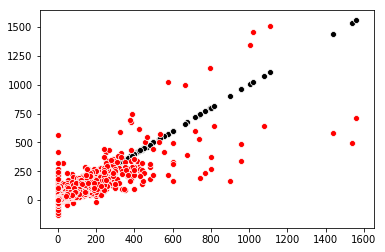

In [57]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_linear, color="red")
plt.show()

In [58]:
mod_svm = svm.SVC (kernel='sigmoid',gamma=3 ,probability=False, random_state=0)
y_pred_svm = mod_svm.fit(x_train,y_train)
pred_svm = mod_svm.predict(x_test)
## pred_svm_cvs = mod_svm.predict(csvTest) ## write to file
acc_svm=accuracy_score(y_test,pred_svm, normalize=False)
print("acc svm", acc_svm)
mae_svm = mean_absolute_error(y_test, pred_svm)
print("MAE svm",mae_svm)

acc svm 2736
MAE svm 29.242161889551987


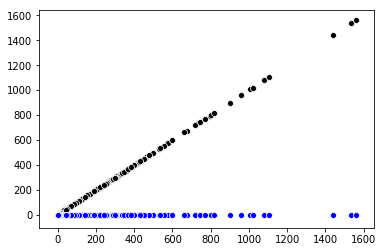

In [59]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_svm, color="blue")
plt.show()

In [60]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y_pred_AdaBoost = mod_rforest.fit(x_train,y_train)
pred_AdaBoost = mod_rforest.predict(x_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

acc AdaBoost 1490
mea AdaBoost 25.049003950575777


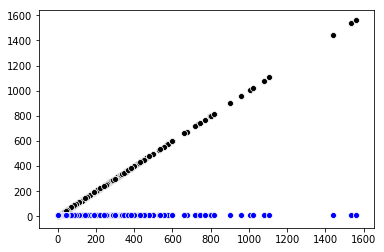

In [61]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_AdaBoost, color="blue")
plt.show()

In [62]:
from sklearn.naive_bayes import GaussianNB
mod_bayes = GaussianNB()
y_pred_naive = mod_bayes.fit(x_train,y_train)
pred_naive = mod_bayes.predict(x_test)
acc_naive=accuracy_score(y_test, pred_naive, normalize=False)
print("acc naive", acc_naive)
mae_naive = mean_absolute_error(y_test, pred_naive)
print("MAE naive", mae_naive)

acc naive 8
MAE naive 173.56215852735983


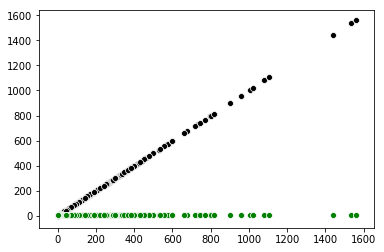

In [63]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=acc_naive, color="green")
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression
mod_logistic = LogisticRegression()
mod_logistic.fit(x_train,y_train)
pred_logistic = mod_logistic.predict(x_test)
acc_logistic=accuracy_score(y_test, pred_logistic, normalize=False)
print("acc logistic", acc_logistic)
mae_logistic = mean_absolute_error(y_test, pred_logistic)
print("MAE logistic", mae_logistic)

C:\Eyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Eyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


acc logistic 2736
MAE logistic 29.242161889551987


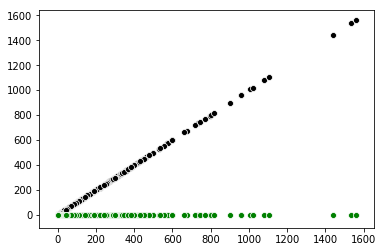

In [65]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_logistic, color="green")
plt.show()

## Initiate a new database of high corelation columns 

In [66]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

DropData = Data.drop(columns=['Avg_Quantity_for_Week','Below_Standard_Price','Total_Quantity','Holiday','Temp_Hi','Temp_Lo','Temp_Rain'])
print(DropData)

        Customer_ID  Weeknum        Product  Customer_Number  Sum_Quantity  \
0            0.0048       11             17        416000001            33   
1            0.0048       12             17        416000001            44   
2            0.0048       13             17        416000001            33   
3            0.0048       14             17        416000001             0   
4            0.0048       15             17        416000001             3   
5            0.0048       16             17        416000001            30   
6            0.0048       17             17        416000001             3   
7            0.0048       18             17        416000001            92   
8            0.0048       19             17        416000001            33   
9            0.0048       20             17        416000001            50   
10           0.0048       21             17        416000001            17   
11           0.0048       22             17        416000001    

In [67]:
DropData.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Frequency_PO                         float64
Sum_Quantity_1_Y                       int64
dtype: object

In [68]:
y2 = DropData.values[:, -1]
x2 = DropData.values[:, 2:-1]

In [69]:
indexes = [x2 for x2 in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]

x2_train = x2[train_indx]
x2_test = x2[test_indx]
y2_train = y2[train_indx]
y2_test = y2[test_indx]

In [70]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

acc AdaBoost 4062
mea AdaBoost 23.46885769521728


In [71]:
## while removing more parameters the ACC is lower, for example removing äbove standard price - 4037; removing customer number - lower then 2000
## with Below standard price - 3945 
## adding weeknum - 3980